In [1]:
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

In [2]:
DataFrame = pd.read_csv('Worksheet.csv')

#Check the shape
print(DataFrame.shape)

(402, 25)


In [3]:
DataFrame.keys()

Index(['Sno', 'Which of the following best describes your age?',
       'What gender do you most identify with?',
       'Are you a registered to vote?',
       'Are you registered to vote at the current address you reside at?',
       'Do you feel that you fully understand the election process?',
       'In the last 5 years did you vote in a local election? This includes voting for Councillor & mayors',
       'Did you voted in the  2021 elections?', 'If not voted, why ?',
       'On what basis do you assess a political candidate?',
       'Which of the following best describes your decision to vote in the 2021 election?',
       'On what basis you select your political candidate.',
       'Contributed or collected money', 'Attended election meetings/rallies',
       'Participated in door to door canvassing',
       'Distributed election leaflets or put up posters',
       'Do you think the existing government is going in the right direction to benefit Tamil Nadu's people?',
       'H

In [4]:
DataFrame.head(5).T

,0,1,2,3,4
Sno,1,2,3,4,5
Which of the following best describes your age?,25 - 40,18 - 24,18 - 24,25 - 40,18 - 24
What gender do you most identify with?,Female,Male,Male,Male,Female
Are you a registered to vote?,Yes,Yes,Yes,Yes,No
Are you registered to vote at the current address you reside at?,No,Yes,No,Yes,No
Do you feel that you fully understand the election process?,A moderate amount,A lot,A lot,A lot,A moderate amount
In the last 5 years did you vote in a local election? This includes voting for Councillor & mayors,Yes,Yes,Yes,No,No
Did you voted in the 2021 elections?,Yes,Yes,Yes,Yes,No
"If not voted, why ?",NaN,NaN,NaN,NaN,"I'm Eligible to vote, but not having Voter ID"
On what basis do you assess a political candidate?,Articles in the newspaper,News on TV,News on TV,I research all the channels before making my c...,I research all the channels before making my c...


In [5]:
column_dict={"Which of the following best describes your age?":"Col1",
          "What gender do you most identify with?":"Col2",
          "Are you a registered to vote?":"Col3",
          "Are you registered to vote at the current address you reside at?":"Col4",
          "Do you feel that you fully understand the election process?":"Col5",
          "In the last 5 years did you vote in a local election? This includes voting for Councillor & mayors":"Col6",
          "Did you voted in the  2021 elections?":"Col7",
          "If not voted, why ?":"Col8",
          "On what basis do you assess a political candidate?":"Col9",
          "Which of the following best describes your decision to vote in the 2021 election?":"Col10",
          "On what basis you select your political candidate.":"Col11",
          "Contributed or collected money":"Col12",
          "Attended election meetings/rallies":"Col13",
          "Participated in door to door canvassing":"Col14",
          "Distributed election leaflets or put up posters":"Col15",
          "Do you think the existing government is going in the right direction to benefit Tamil Nadu's people?":"Col16",
          "How would you rate Edappadi Palanisamy’s performance as the Chief Minister of Tamil Nadu ":"Col17",
          "What is your assessment of the performance of the AIADMK government in Tamil Nadu in the last five years? Would you say that you have been satisfied or dissatisfied with it? ":"Col18",
          "During the last two- three years have you or any of your family members benefited from any Government scheme ? ":"Col19",
          "On the day of voting will you vote for the same party which you voted now or your decision may change? ":"Col20",
          "Which party do you support in your ward?":"Col21",
          "What is your opinion about the candidate? ":"Col22",
          "Which party will rule Tamil Nadu for the next five years?":"Col23",
          "Why do you think your candidate will win?":"Col24"}

DataFrame.rename(columns=column_dict, inplace=True)

#Check the column names again
DataFrame.columns

Index(['Sno', 'Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8',
       'Col9', 'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15', 'Col16',
       'Col17', 'Col18', 'Col19', 'Col20', 'Col21', 'Col22', 'Col23', 'Col24'],
      dtype='object')

###### Rename the columns to have meaningful names

In [6]:
DataFrame.head(5).T

,0,1,2,3,4
Sno,1,2,3,4,5
Col1,25 - 40,18 - 24,18 - 24,25 - 40,18 - 24
Col2,Female,Male,Male,Male,Female
Col3,Yes,Yes,Yes,Yes,No
Col4,No,Yes,No,Yes,No
Col5,A moderate amount,A lot,A lot,A lot,A moderate amount
Col6,Yes,Yes,Yes,No,No
Col7,Yes,Yes,Yes,Yes,No
Col8,NaN,NaN,NaN,NaN,"I'm Eligible to vote, but not having Voter ID"
Col9,Articles in the newspaper,News on TV,News on TV,I research all the channels before making my c...,I research all the channels before making my c...


In [7]:
DataFrame.set_index("Sno")

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
Sno,,,,,,,,,,,,,,,,,,,,,
1,25 - 40,Female,Yes,No,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,"I am going to vote, and I know which candidate...",...,No,Yes,Neutral,I'm not sure,No,Vote for the same party,NOTA,NaN,Others,NaN
2,18 - 24,Male,Yes,Yes,A lot,Yes,Yes,NaN,News on TV,"I am going to vote, and I know which candidate...",...,No,No,Neutral,Fully dissatisfied,No,Vote for the same party,MNM,NaN,M. A. Stalin,NaN
3,18 - 24,Male,Yes,No,A lot,Yes,Yes,NaN,News on TV,"I am going to vote, and I know which candidate...",...,No,Yes,Good,Somewhat satisfied,I'm not sure,Vote for the same party,AIADMK / BJP,Honest sincere and hardworking,Edappadi Palanisamy,Because of his leadership experience and ideol...
4,25 - 40,Male,Yes,Yes,A lot,No,Yes,NaN,I research all the channels before making my c...,"I am going to vote, and I know which candidate...",...,No,Yes,Very good,Fully satisfied,Yes,Vote for the same party,AIADMK / BJP,Satisfactory,Edappadi Palanisamy,He is the best
5,18 - 24,Female,No,No,A moderate amount,No,No,"I'm Eligible to vote, but not having Voter ID",I research all the channels before making my c...,"I am going to vote, and I know which candidate...",...,Yes,No,Very Bad,Somewhat dissatisfied,No,Vote for the same party,MNM,New-promising candidate ..,Kamal Haasan,Has concern for the people
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,25 - 40,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,News on TV,"I am going to vote, and I know which candidate...",...,No,Yes,Very good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN
399,41 - 50,Male,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,"I am going to vote, and I know which candidate...",...,No,Yes,Good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN
400,41 - 50,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,"I am going to vote, and I know which candidate...",...,No,Yes,Very good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN


### EDA

In [8]:
categoricals = ['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10', 'Col11', 'Col12', 'Col13', 'Col14', 'Col15', 'Col16', 'Col17',
       'Col18', 'Col19', 'Col20', 'Col23']

##### Checking distribution of the Categorical features

In [9]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.style as style
style.use('fivethirtyeight')

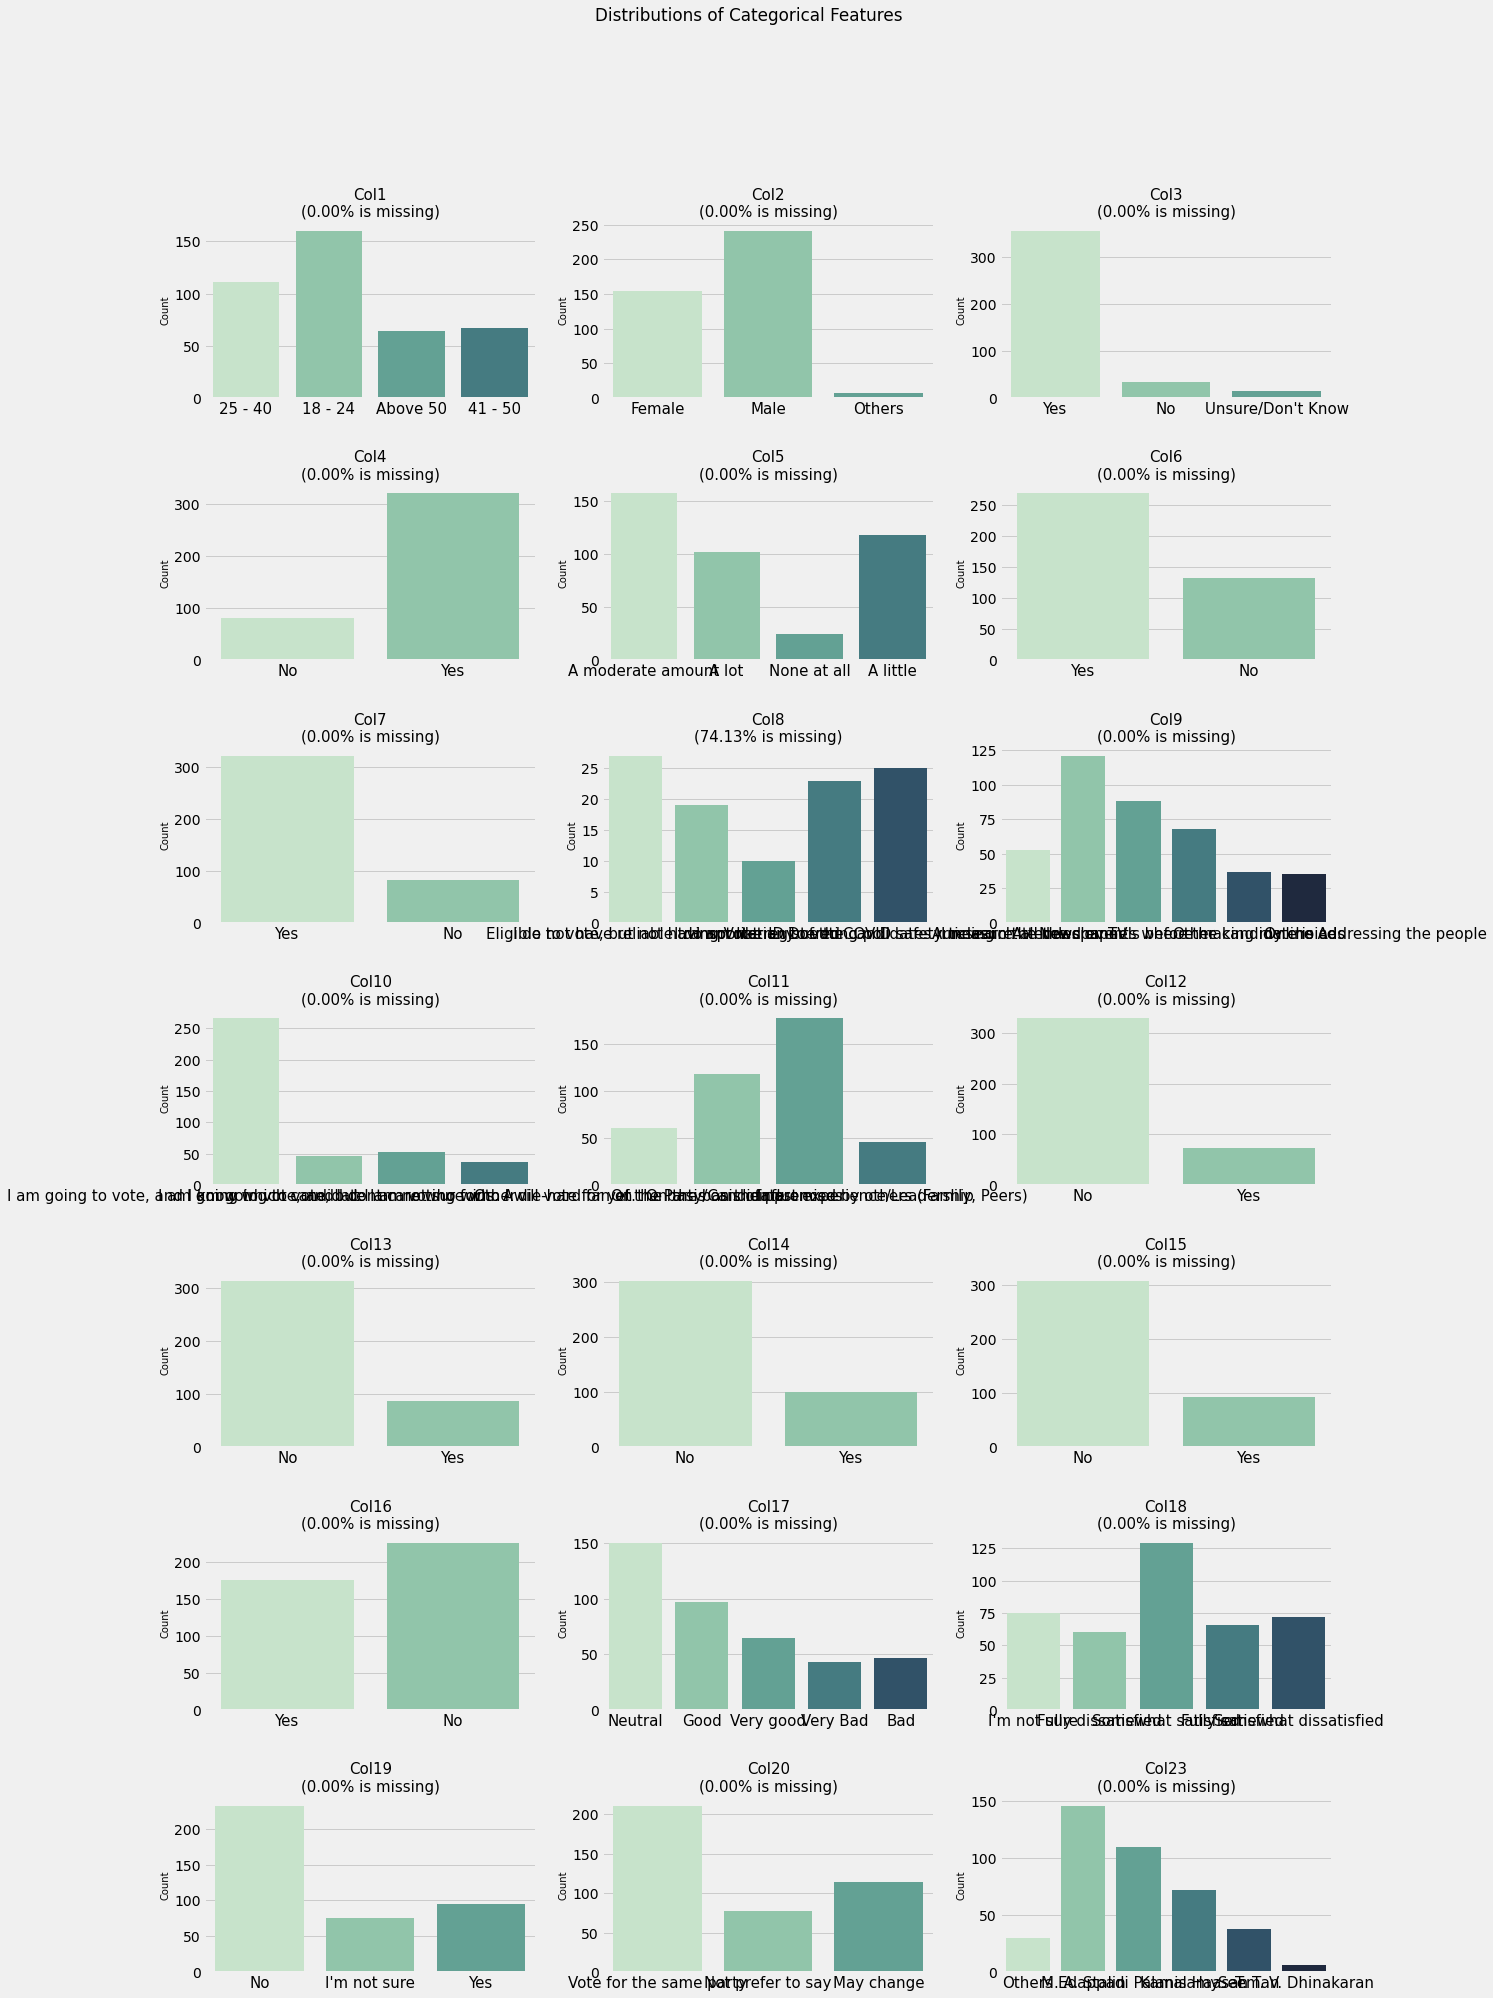

In [28]:
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(18,30))
fig.subplots_adjust(hspace=0.5)
fig.suptitle('Distributions of Categorical Features')

n_rows, n_cols = (7,3)

for index, column in enumerate(categoricals):
    
    i,j = index // n_cols, index % n_cols
    miss_perc="%.2f"%(100*(1-(DataFrame[column].dropna().shape[0])/DataFrame.shape[0]))
    collabel=column+"\n({}% is missing)".format(miss_perc)
    fig = sns.countplot(x=column, data=DataFrame,label=collabel, 
                        palette=sns.cubehelix_palette(rot=-.4,light=0.85,hue=1), ax=axes[i,j])
    
    axes[i,j].set_title(collabel,fontsize=15)
    axes[i,j].set_xlabel(None)
    axes[i,j].set_ylabel("Count",fontsize=10)
    axes[i,j].set_xticklabels(axes[i,j].get_xticklabels(), Fontsize=15)

plt.show()

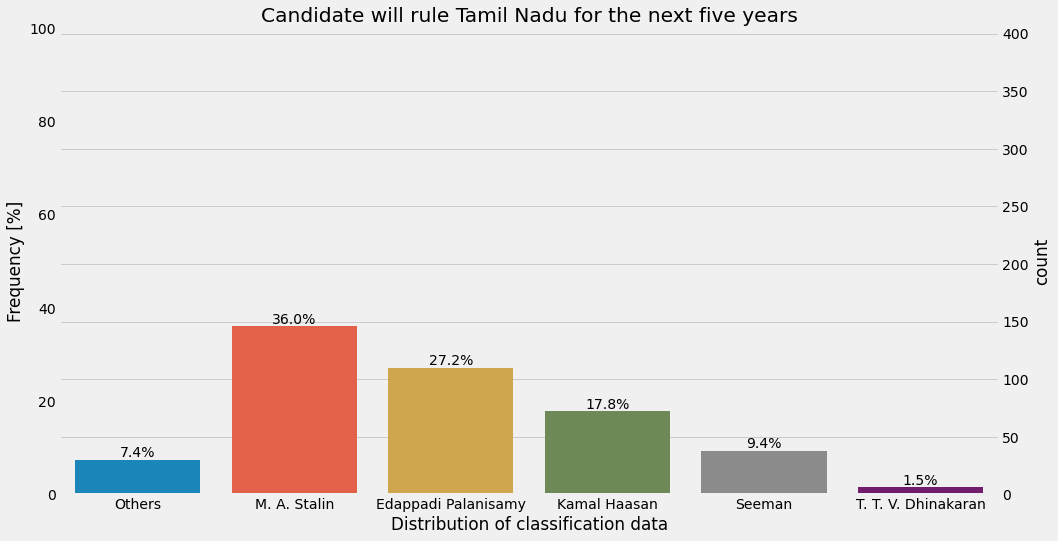

In [11]:
# Some random data
ncount = 405

plt.figure(figsize=(15,8))
ax = sns.countplot(x="Col23", data=DataFrame)
plt.title('Candidate will rule Tamil Nadu for the next five years')
plt.xlabel('Distribution of classification data')

ax2=ax.twinx()
ax2.yaxis.tick_left()
ax.yaxis.tick_right()
ax.yaxis.set_label_position('right')
ax2.yaxis.set_label_position('left')

ax2.set_ylabel('Frequency [%]')

for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text

ax2.set_ylim(0,100)
ax.set_ylim(0,ncount)

ax2.grid(None)

##### Data cleaning 

#### Case 1
    
    # Col3 : Are you a registered to vote? 
    No/Unsure
    # Col7 : Did you voted in the  2021 elections? 
    /Yes
    

In [12]:
A = DataFrame.query('Col3 == ["No"] & Col7 == ["Yes"]')
A

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
197,198,25 - 40,Male,No,Yes,A lot,Yes,Yes,"I'm Eligible to vote, but not having Voter ID",Online Ads,...,No,No,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,promotions,M. A. Stalin,my opinion
246,247,25 - 40,Male,No,Yes,A moderate amount,Yes,Yes,I do not have reliable transportation to votin...,Articles in the newspaper,...,Yes,Yes,Very Bad,Somewhat satisfied,No,Vote for the same party,MNM,Ad,Seeman,Best politician
267,268,41 - 50,Male,No,Yes,A moderate amount,Yes,Yes,NaN,Attended events where the candidate is address...,...,Yes,Yes,Very good,Fully satisfied,Yes,Vote for the same party,DMK / CONGRESS,Good changer,Kamal Haasan,He follows promises
270,271,25 - 40,Female,No,Yes,A moderate amount,Yes,Yes,NaN,Online Ads,...,No,Yes,Good,Somewhat dissatisfied,Yes,Vote for the same party,MNM,No idea,Kamal Haasan,does good for people


#### Case 2

    # Col1 : Which of the following best describes your age?    
    /Above 25
    # Col3 : Are you a registered to vote?    
    /No/Unsure


In [13]:
B = DataFrame.query('Col1 != ["18 - 24","25 - 40"] & Col3 == ["No"]')
B

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
196,197,Above 50,Female,No,No,None at all,No,No,"I'm Eligible to vote, but not having Voter ID",Other,...,Yes,Yes,Neutral,I'm not sure,No,Vote for the same party,NTK,ntk is best,Edappadi Palanisamy,majority
202,203,41 - 50,Male,No,No,A lot,No,No,I do not have reliable transportation to votin...,Articles in the newspaper,...,No,No,Neutral,Somewhat satisfied,No,May change,DMK / CONGRESS,NaN,M. A. Stalin,NaN
213,214,Above 50,Male,No,No,None at all,No,No,Due to COVID safety measure,I research all the channels before making my c...,...,No,No,Bad,I'm not sure,I'm not sure,Not prefer to say,AIADMK / BJP,Need more experience about the process,Edappadi Palanisamy,Publicity
220,221,41 - 50,Female,No,No,None at all,No,No,Due to COVID safety measure,Other,...,No,No,Good,Somewhat satisfied,Yes,Not prefer to say,DMK / CONGRESS,NaN,Kamal Haasan,NaN
223,224,Above 50,Female,No,No,A lot,Yes,No,I do not have reliable transportation to votin...,News on TV,...,No,No,Neutral,Somewhat dissatisfied,No,May change,MNM,NaN,M. A. Stalin,NaN
232,233,Above 50,Male,No,No,A lot,Yes,No,Due to COVID safety measure,Other,...,No,No,Very Bad,Fully dissatisfied,No,May change,NOTA,NaN,T. T. V. Dhinakaran,NaN
248,249,41 - 50,Male,No,No,A moderate amount,No,No,"I'm Eligible to vote, but not having Voter ID",News on TV,...,No,Yes,Neutral,Somewhat dissatisfied,No,Not prefer to say,Others,NaN,Others,NaN
267,268,41 - 50,Male,No,Yes,A moderate amount,Yes,Yes,NaN,Attended events where the candidate is address...,...,Yes,Yes,Very good,Fully satisfied,Yes,Vote for the same party,DMK / CONGRESS,Good changer,Kamal Haasan,He follows promises
288,289,41 - 50,Male,No,No,None at all,No,No,I am not registered,Other,...,No,No,Neutral,Somewhat dissatisfied,No,Not prefer to say,NOTA,NaN,Others,NaN


In [14]:
DataFrame["Col8"]=DataFrame["Col8"].replace("I'm Eligible to vote, but not having Voter ID", "Eligible to vote, but not having Voter ID")

#### Case 3
    
    # Col6 : In the last 5 years did you vote in a local election? This includes voting for Councillor & mayors  
    /Yes
    # Col8 : If not voted, why ?    
    /I'm Eligible to vote, but not having Voter ID
    

In [15]:
C = DataFrame.query('Col6 == ["Yes"] & Col8 == ["Eligible to vote, but not having Voter ID"]')
C

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
8,9,18 - 24,Male,Yes,Yes,A little,Yes,Yes,"Eligible to vote, but not having Voter ID",I research all the channels before making my c...,...,No,Yes,Neutral,I'm not sure,Yes,Not prefer to say,MNM,Nil,Kamal Haasan,Kamal Haasan
182,183,25 - 40,Female,Yes,No,A moderate amount,Yes,No,"Eligible to vote, but not having Voter ID",Online Ads,...,Yes,Yes,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,Rude,Edappadi Palanisamy,Good leader
197,198,25 - 40,Male,No,Yes,A lot,Yes,Yes,"Eligible to vote, but not having Voter ID",Online Ads,...,No,No,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,promotions,M. A. Stalin,my opinion
228,229,18 - 24,Female,Yes,Yes,A little,Yes,No,"Eligible to vote, but not having Voter ID",Articles in the newspaper,...,No,No,Neutral,Somewhat satisfied,I'm not sure,May change,NTK,NaN,T. T. V. Dhinakaran,NaN
290,291,18 - 24,Female,Yes,Yes,A lot,Yes,Yes,"Eligible to vote, but not having Voter ID",Attended events where the candidate is address...,...,No,Yes,Neutral,Somewhat satisfied,Yes,May change,DMK / CONGRESS,NaN,Seeman,NaN


#### Case 4
    
    # Col16 : Do you think the existing government is going in the right direction to benefit Tamil Nadu's people?
    /Yes
    # Col17 : How would you rate Edappadi Palanisamy’s performance as the Chief Minister of Tamil Nadu  
    /Very Bad (Biased)


In [16]:
D = DataFrame.query('Col16 == ["Yes"] & Col17 == ["Very Bad","Bad"]')
D

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
23,24,18 - 24,Female,Yes,Yes,A lot,No,Yes,NaN,I research all the channels before making my c...,...,No,Yes,Very Bad,Fully dissatisfied,No,May change,DMK / CONGRESS,Promises are strong.,M. A. Stalin,Governance of ruling party are bad so there wi...
171,172,41 - 50,Others,Yes,No,A moderate amount,No,Yes,NaN,Attended events where the candidate is address...,...,Yes,Yes,Bad,Somewhat satisfied,I'm not sure,May change,DMK / CONGRESS,Good person,M. A. Stalin,Talented
173,174,18 - 24,Female,No,No,None at all,No,No,"Eligible to vote, but not having Voter ID",Other,...,No,Yes,Very Bad,Somewhat dissatisfied,I'm not sure,Not prefer to say,DMK / CONGRESS,Talented,M. A. Stalin,Talented
174,175,25 - 40,Female,Yes,No,A little,Yes,No,I do not like any of the candidates running,Online Ads,...,Yes,Yes,Bad,Somewhat satisfied,No,May change,NTK,No opinion,Edappadi Palanisamy,Majority
182,183,25 - 40,Female,Yes,No,A moderate amount,Yes,No,"Eligible to vote, but not having Voter ID",Online Ads,...,Yes,Yes,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,Rude,Edappadi Palanisamy,Good leader
246,247,25 - 40,Male,No,Yes,A moderate amount,Yes,Yes,I do not have reliable transportation to votin...,Articles in the newspaper,...,Yes,Yes,Very Bad,Somewhat satisfied,No,Vote for the same party,MNM,Ad,Seeman,Best politician


#### Case 5
    
    # Col11 : On what basis you select your political candidate. 
    /A die-hard fan of the Party/Candidate
    # Col10 : Which of the following best describes your decision to vote in the 2021 election? 
    /I am going to vote, and I don't care who wins.
    

In [17]:
DataFrame["Col10"]=DataFrame["Col10"].replace("I am going to vote, and I don't care who wins.", "I am going to vote, and I dont care who wins.")

In [18]:
E = DataFrame.query('Col11 == ["A die-hard fan of the Party/Candidate"] & Col10 == ["I am going to vote, and I dont care who wins."]')
E

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
141,142,Above 50,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,Yes,No,Bad,Somewhat dissatisfied,No,Vote for the same party,DMK / CONGRESS,Congress,M. A. Stalin,They'll get more votes this time
144,145,Above 50,Male,Yes,Yes,A lot,Yes,Yes,NaN,I research all the channels before making my c...,...,Yes,Yes,Neutral,I'm not sure,Yes,Vote for the same party,DMK / CONGRESS,Good,M. A. Stalin,Talented person
221,222,Above 50,Female,Yes,No,A lot,Yes,Yes,NaN,Other,...,Yes,No,Good,Somewhat dissatisfied,Yes,May change,NTK,-,Seeman,May win due to power of money


In [19]:
Cleanup_Data = [A, B, C, D, E]
Cleanup_Result = pd.concat(Cleanup_Data)
Cleanup_Result

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
197,198,25 - 40,Male,No,Yes,A lot,Yes,Yes,"I'm Eligible to vote, but not having Voter ID",Online Ads,...,No,No,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,promotions,M. A. Stalin,my opinion
246,247,25 - 40,Male,No,Yes,A moderate amount,Yes,Yes,I do not have reliable transportation to votin...,Articles in the newspaper,...,Yes,Yes,Very Bad,Somewhat satisfied,No,Vote for the same party,MNM,Ad,Seeman,Best politician
267,268,41 - 50,Male,No,Yes,A moderate amount,Yes,Yes,NaN,Attended events where the candidate is address...,...,Yes,Yes,Very good,Fully satisfied,Yes,Vote for the same party,DMK / CONGRESS,Good changer,Kamal Haasan,He follows promises
270,271,25 - 40,Female,No,Yes,A moderate amount,Yes,Yes,NaN,Online Ads,...,No,Yes,Good,Somewhat dissatisfied,Yes,Vote for the same party,MNM,No idea,Kamal Haasan,does good for people
196,197,Above 50,Female,No,No,None at all,No,No,"I'm Eligible to vote, but not having Voter ID",Other,...,Yes,Yes,Neutral,I'm not sure,No,Vote for the same party,NTK,ntk is best,Edappadi Palanisamy,majority
202,203,41 - 50,Male,No,No,A lot,No,No,I do not have reliable transportation to votin...,Articles in the newspaper,...,No,No,Neutral,Somewhat satisfied,No,May change,DMK / CONGRESS,NaN,M. A. Stalin,NaN
213,214,Above 50,Male,No,No,None at all,No,No,Due to COVID safety measure,I research all the channels before making my c...,...,No,No,Bad,I'm not sure,I'm not sure,Not prefer to say,AIADMK / BJP,Need more experience about the process,Edappadi Palanisamy,Publicity
220,221,41 - 50,Female,No,No,None at all,No,No,Due to COVID safety measure,Other,...,No,No,Good,Somewhat satisfied,Yes,Not prefer to say,DMK / CONGRESS,NaN,Kamal Haasan,NaN
223,224,Above 50,Female,No,No,A lot,Yes,No,I do not have reliable transportation to votin...,News on TV,...,No,No,Neutral,Somewhat dissatisfied,No,May change,MNM,NaN,M. A. Stalin,NaN
232,233,Above 50,Male,No,No,A lot,Yes,No,Due to COVID safety measure,Other,...,No,No,Very Bad,Fully dissatisfied,No,May change,NOTA,NaN,T. T. V. Dhinakaran,NaN


In [20]:
Cleanup_Result = pd.DataFrame.drop_duplicates(Cleanup_Result)
Cleanup_Result.set_index("Sno")

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
Sno,,,,,,,,,,,,,,,,,,,,,
198,25 - 40,Male,No,Yes,A lot,Yes,Yes,"I'm Eligible to vote, but not having Voter ID",Online Ads,"I am going to vote, but I am not sure who I wi...",...,No,No,Bad,Somewhat satisfied,No,May change,DMK / CONGRESS,promotions,M. A. Stalin,my opinion
247,25 - 40,Male,No,Yes,A moderate amount,Yes,Yes,I do not have reliable transportation to votin...,Articles in the newspaper,"I am going to vote, but I am not sure who I wi...",...,Yes,Yes,Very Bad,Somewhat satisfied,No,Vote for the same party,MNM,Ad,Seeman,Best politician
268,41 - 50,Male,No,Yes,A moderate amount,Yes,Yes,NaN,Attended events where the candidate is address...,"I am going to vote, and I know which candidate...",...,Yes,Yes,Very good,Fully satisfied,Yes,Vote for the same party,DMK / CONGRESS,Good changer,Kamal Haasan,He follows promises
271,25 - 40,Female,No,Yes,A moderate amount,Yes,Yes,NaN,Online Ads,"I am going to vote, but I am not sure who I wi...",...,No,Yes,Good,Somewhat dissatisfied,Yes,Vote for the same party,MNM,No idea,Kamal Haasan,does good for people
197,Above 50,Female,No,No,None at all,No,No,"I'm Eligible to vote, but not having Voter ID",Other,"I am going to vote, but I am not sure who I wi...",...,Yes,Yes,Neutral,I'm not sure,No,Vote for the same party,NTK,ntk is best,Edappadi Palanisamy,majority
203,41 - 50,Male,No,No,A lot,No,No,I do not have reliable transportation to votin...,Articles in the newspaper,Other,...,No,No,Neutral,Somewhat satisfied,No,May change,DMK / CONGRESS,NaN,M. A. Stalin,NaN
214,Above 50,Male,No,No,None at all,No,No,Due to COVID safety measure,I research all the channels before making my c...,Other,...,No,No,Bad,I'm not sure,I'm not sure,Not prefer to say,AIADMK / BJP,Need more experience about the process,Edappadi Palanisamy,Publicity
221,41 - 50,Female,No,No,None at all,No,No,Due to COVID safety measure,Other,Other,...,No,No,Good,Somewhat satisfied,Yes,Not prefer to say,DMK / CONGRESS,NaN,Kamal Haasan,NaN
224,Above 50,Female,No,No,A lot,Yes,No,I do not have reliable transportation to votin...,News on TV,"I am going to vote, and I don't care who wins.",...,No,No,Neutral,Somewhat dissatisfied,No,May change,MNM,NaN,M. A. Stalin,NaN


In [21]:
F = list(Cleanup_Result["Sno"])

In [22]:
F

[198,
 247,
 268,
 271,
 197,
 203,
 214,
 221,
 224,
 233,
 249,
 289,
 9,
 183,
 198,
 229,
 291,
 24,
 172,
 174,
 175,
 142,
 145,
 222]

In [23]:
Refined_Dataset = DataFrame.query('Sno != [198, 247, 268, 271, 197, 203, 214, 221, 224, 233, 249, 289, 9, 183, 198, 229, 291, 24, 172, 174, 175, 142, 145, 222]')
Refined_Dataset

,Sno,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col15,Col16,Col17,Col18,Col19,Col20,Col21,Col22,Col23,Col24
0,1,25 - 40,Female,Yes,No,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,No,Yes,Neutral,I'm not sure,No,Vote for the same party,NOTA,NaN,Others,NaN
1,2,18 - 24,Male,Yes,Yes,A lot,Yes,Yes,NaN,News on TV,...,No,No,Neutral,Fully dissatisfied,No,Vote for the same party,MNM,NaN,M. A. Stalin,NaN
2,3,18 - 24,Male,Yes,No,A lot,Yes,Yes,NaN,News on TV,...,No,Yes,Good,Somewhat satisfied,I'm not sure,Vote for the same party,AIADMK / BJP,Honest sincere and hardworking,Edappadi Palanisamy,Because of his leadership experience and ideol...
3,4,25 - 40,Male,Yes,Yes,A lot,No,Yes,NaN,I research all the channels before making my c...,...,No,Yes,Very good,Fully satisfied,Yes,Vote for the same party,AIADMK / BJP,Satisfactory,Edappadi Palanisamy,He is the best
4,5,18 - 24,Female,No,No,A moderate amount,No,No,"Eligible to vote, but not having Voter ID",I research all the channels before making my c...,...,Yes,No,Very Bad,Somewhat dissatisfied,No,Vote for the same party,MNM,New-promising candidate ..,Kamal Haasan,Has concern for the people
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,398,25 - 40,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,News on TV,...,No,Yes,Very good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN
398,399,41 - 50,Male,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,No,Yes,Good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN
399,400,41 - 50,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,No,Yes,Very good,Fully satisfied,No,Vote for the same party,AIADMK / BJP,NaN,Edappadi Palanisamy,NaN
400,401,Above 50,Female,Yes,Yes,A moderate amount,Yes,Yes,NaN,Articles in the newspaper,...,No,No,Neutral,I'm not sure,No,Vote for the same party,DMK / CONGRESS,NaN,M. A. Stalin,NaN


In [24]:
DataFrame.shape

(402, 25)

In [25]:
Cleanup_Result.shape

(24, 25)

In [26]:
Refined_Dataset.shape

(379, 25)

In [27]:
Refined_Dataset.to_csv('Refined_Worksheet.csv', header=True, index=False) 